In [18]:
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 18})

import numpy as np
import pandas as pd
from sklearn import datasets

## Basic plot

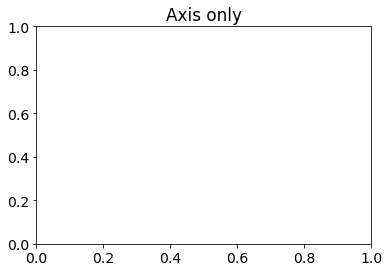

In [79]:
fig, ax = plt.subplots()  # Create a figure containing a single axes.
ax.set_title('Axis only')
plt.show()

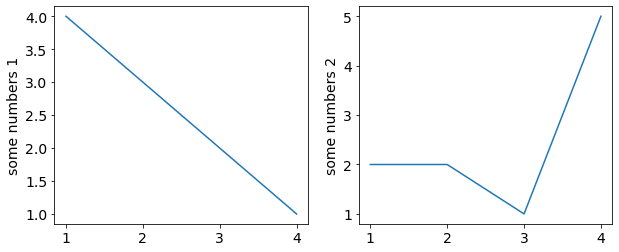

In [86]:
plt.figure(figsize=(10,4)) # Set figure size

plt.subplot(1,2,1)  # Create a figure containing two axes. Focusing on the first axes
plt.plot([1, 2, 3, 4], [4, 3, 2, 1]);  # Plot some data on the axes.
plt.ylabel('some numbers 1') # Set label on y axis

plt.subplot(1,2,2)  # Focusing on the second axes
plt.plot([1, 2, 3, 4], [2, 2, 1, 5]);  # Plot some data on the axes.
plt.ylabel('some numbers 2')
plt.show()

## Plot functions. 

#### Below is an example of $\sin(x)+x+x\cdot \sin(x)$.

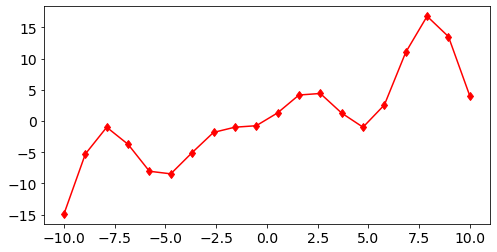

In [85]:
def f(x):
    return np.sin(x) + x + x * np.sin(x)

plt.figure(figsize=(8,4))

x = np.linspace(-10, 10, 20)  # Generate an array of 20 numbers ranging from -10 to 10

plt.plot(x, f(x), color='red', marker='d')  # Plot with red color and diamond markers.

plt.show()

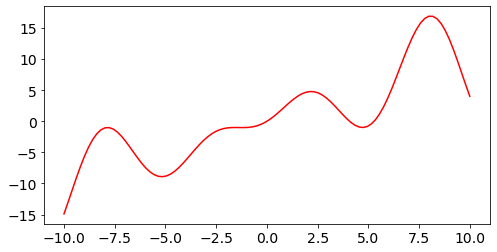

In [84]:

plt.figure(figsize=(8,4))

# Increase the precision of the array. Now it contains 100 numbers within the same range.
x = np.linspace(-10, 10, 100) 

plt.plot(x, f(x), color='red')

plt.show()

#### Plot $y=1/x$. Same approach does not work here, as the function value "jump" after x=0.

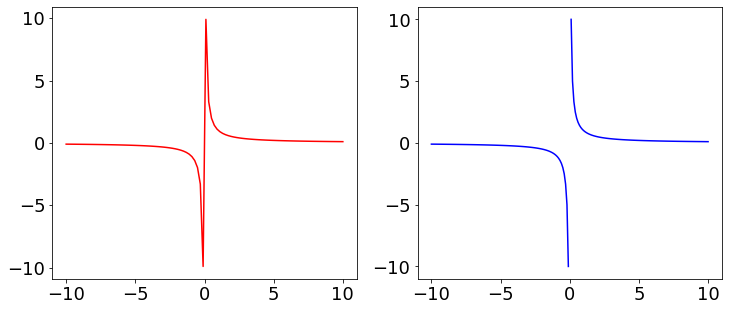

In [34]:

def f(x):
    return 1.0/x

plt.figure(figsize=(12,5))
plt.subplot(1,2,1)  

x = np.linspace(-10, 10, 100)
plt.plot(x, f(x), color='red')

plt.subplot(1,2,2)

x = np.linspace(-10, -0.1, 100)
plt.plot(x, f(x), color='blue')

x = np.linspace(0.1, 10, 100)
plt.plot(x, f(x), color='blue')

plt.show()

## Iris Dataset

In [47]:
plt.rcParams.update({'font.size': 14})  # Decrease the plot font size

In [16]:
iris = datasets.load_iris() #Loading the dataset

dict_keys(['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [19]:
# Converting it into Dataframe
iris = pd.DataFrame(
    data= np.c_[iris['data'], iris['target']],
    columns= iris['feature_names'] + ['target']
    )

#### Pandas.Dataframe is a class that stores "Two-dimensional, size-mutable, potentially heterogeneous tabular data". It can be considered as SQL Tables in Python.

In [24]:
iris.shape

(150, 5)

In [25]:
iris.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
5,5.4,3.9,1.7,0.4,0.0
6,4.6,3.4,1.4,0.3,0.0
7,5.0,3.4,1.5,0.2,0.0
8,4.4,2.9,1.4,0.2,0.0
9,4.9,3.1,1.5,0.1,0.0


In [45]:
iris.groupby('target').size()

target
0.0    50
1.0    50
2.0    50
dtype: int64

In [21]:
iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


![title](boxplot.jpg)

Median, First Quantile, Third Quantile, Whiskers, Maximum, Minimm, and Outliers.

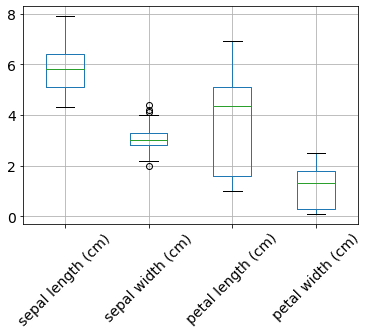

In [82]:
iris.drop('target',axis=1).boxplot(rot=45)
plt.show()

### Focus on one feature: sepal length.

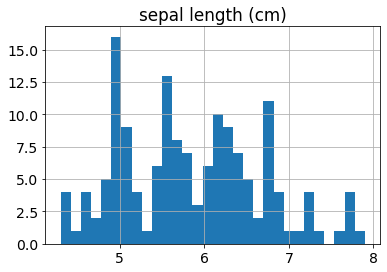

In [73]:
iris.hist('sepal length (cm)', bins=30)
plt.show()

### Initialize three dataframes with different target values

In [ ]:
type0_df = iris[iris['target']==0.0]
type1_df = iris[iris['target']==1.0]
type2_df = iris[iris['target']==2.0]

### Visualize sepal length of different iris types via histograms

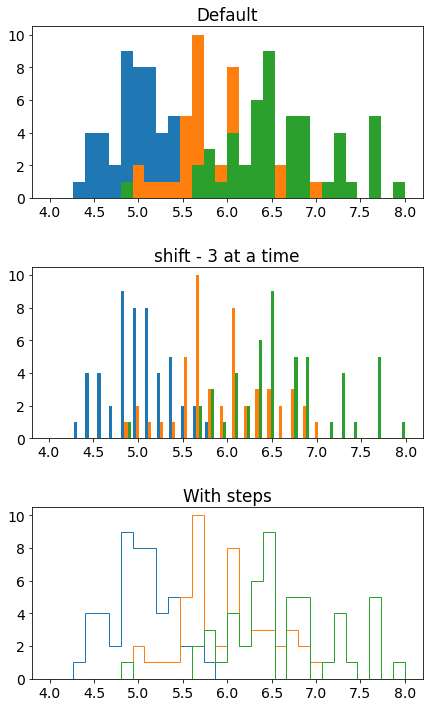

In [78]:
plt.figure(figsize=(7,12))

common_params = dict(bins=30, 
                     range=(4, 8))
a = type0_df['sepal length (cm)'].values
b = type1_df['sepal length (cm)'].values
c = type2_df['sepal length (cm)'].values

plt.subplots_adjust(hspace=.4)
plt.subplot(311)
plt.title('Default')
plt.hist(a, **common_params)
plt.hist(b, **common_params)
plt.hist(c, **common_params)
plt.subplot(312)
plt.title('shift - 3 at a time')
plt.hist((a, b, c), **common_params)
plt.subplot(313)
common_params['histtype'] = 'step'
plt.title('With steps')
plt.hist(a, **common_params)
plt.hist(b, **common_params)
plt.hist(c, **common_params)
plt.show()

### Correlation between features

In [61]:
iris.drop('target',axis=1).corr()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


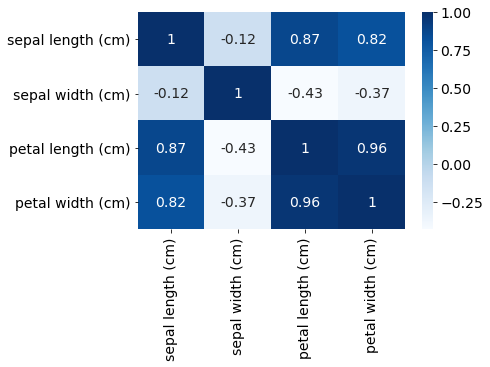

In [67]:
import seaborn 
corr = iris.drop('target',axis=1).corr()
seaborn.heatmap(corr, cmap="Blues", annot=True)
plt.show()

### Scatter plot to visualize samples with two features, i.e., petal length and width.

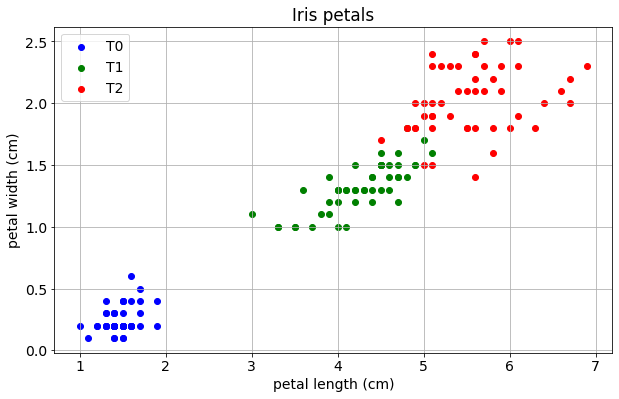

In [59]:


fig, ax = plt.subplots()
fig.set_size_inches(10, 6) # adjusting the length and width of plot

# lables and scatter points
ax.scatter(type0_df['petal length (cm)'], type0_df['petal width (cm)'], label="T0", facecolor="blue")
ax.scatter(type1_df['petal length (cm)'], type1_df['petal width (cm)'], label="T1", facecolor="green")
ax.scatter(type2_df['petal length (cm)'], type2_df['petal width (cm)'], label="T2", facecolor="red")


ax.set_xlabel("petal length (cm)")
ax.set_ylabel("petal width (cm)")
ax.grid()
ax.set_title("Iris petals")
ax.legend()

plt.show()